# Data Analysis Project Roadmap
In this notebook we will be experimenting how does a data analysis project work and what points to keep in mind.
I believe there are 2 approaches to have in mind before performing data analysis.
- What does the data speak or what is the problem at hand?
- Do we have a predicting label in the data?

After giving a little research on this, i can conclude weather to perform predictive analysis or descriptive analysis.


This notebook mainly focuses on descriptive analysis and following points to be kept in mind
1. Agenda
2. KPI's for solving the problem
3. Data collection
4. Data Exploration
5. Cleaning the data
6. Analysing and Visualizing the data

### Agenda/Problem Statement:
Below are the problem statements and we will see how we can use data to solve them
- Skill Based job search
- Job analysis based on location
- Salary Comparision

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Data Collection:
We have collected the data by cloning from the github

In [2]:
!git clone https://github.com/AshishJangra27/datasets

fatal: destination path 'datasets' already exists and is not an empty directory.


In [3]:
import os
print('Contents of the existing datasets directory:')
if os.path.exists('datasets'):
    print(os.listdir('datasets'))

Contents of the existing datasets directory:
['.git', 'Airbnb', 'Cooking Labels', 'Cricket Players', 'Gaana', 'GFG Articles', 'Goodread Books', 'Hindi Corpus', 'IMDB Celeb', 'IMDB Movies', 'Job Postings', 'LICENSE', 'Myntra Products', 'OpenBook', 'README.md', 'Sherlock', 'Sneaker Sales', 'Swiggy Restaurants']


In [4]:
job_path = 'datasets/Job Postings'
files = os.listdir(job_path)
print(f'files in the job posting directory: {files}')
csv_files = [f for f in files if f.endswith('.csv.zip')]
if csv_files:
    data = pd.read_csv(os.path.join(job_path, csv_files[0]))
else:
    print('no csv files found in job postings')

files in the job posting directory: ['jobs.csv.zip']


### Summary Statistics/Data Exploration:
1. Gather information about the data
2. What are numerical and categorical variables
3. What does the data describe
4. How many null values per column
5. Find the Duplicate values

In [5]:
data.shape

(79147, 12)

In [6]:
data.head()

,job_id,job_role,company,experience,salary,location,rating,reviews,resposibilities,posted_on,job_link,company_link
0,7.012301e+10,Branch Banking - Calling For Women Candidates,Hdfc Bank,1-6 Yrs,Not disclosed,"Kolkata, Hyderabad/Secunderabad, Pune, Ahmedab...",4.0,39110 Reviews,"Customer Service,Sales,Relationship Management",1 Day Ago,https://www.naukri.com/job-listings-branch-ban...,https://www.naukri.com/hdfc-bank-jobs-careers-213
1,6.012391e+10,Product Owner Senior Manager,Accenture,11-15 Yrs,Not disclosed,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",4.1,32129 Reviews,"Product management,Market analysis,Change mana...",1 Day Ago,https://www.naukri.com/job-listings-product-ow...,https://www.naukri.com/accenture-jobs-careers-...
2,6.012391e+10,Employee Relations and Policies Associate Manager,Accenture,3-7 Yrs,Not disclosed,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",4.1,32129 Reviews,"Business process,Change management,Team manage...",1 Day Ago,https://www.naukri.com/job-listings-employee-r...,https://www.naukri.com/accenture-jobs-careers-...
3,6.012391e+10,Employee Relations and Policies Specialist,Accenture,3-7 Yrs,Not disclosed,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",4.1,32129 Reviews,"Business process,Change management,Team manage...",1 Day Ago,https://www.naukri.com/job-listings-employee-r...,https://www.naukri.com/accenture-jobs-careers-...
4,6.012301e+10,SAP BO Consultant,Mindtree,5-7 Yrs,Not disclosed,"Hybrid - Kolkata, Hyderabad/Secunderabad, Pune...",4.1,3759 Reviews,"SAP BO,PL / SQL,Oracle SQL,SAP Business Object...",1 Day Ago,https://www.naukri.com/job-listings-sap-bo-con...,https://www.naukri.com/mindtree-jobs-careers-3...


In [7]:
data.columns

Index(['job_id', 'job_role', 'company', 'experience', 'salary', 'location',
       'rating', 'reviews', 'resposibilities', 'posted_on', 'job_link',
       'company_link'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79147 entries, 0 to 79146
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   job_id           78667 non-null  float64
 1   job_role         78667 non-null  object 
 2   company          78666 non-null  object 
 3   experience       77398 non-null  object 
 4   salary           78667 non-null  object 
 5   location         77441 non-null  object 
 6   rating           42948 non-null  float64
 7   reviews          42948 non-null  object 
 8   resposibilities  78647 non-null  object 
 9   posted_on        78667 non-null  object 
 10  job_link         78667 non-null  object 
 11  company_link     78667 non-null  object 
dtypes: float64(2), object(10)
memory usage: 7.2+ MB


In [9]:
data.describe()#will work on numerical cols

,job_id,rating
count,7.866700e+04,42948.000000
mean,1.255071e+11,3.940144
std,1.097464e+11,0.519211
min,1.012200e+10,1.000000
25%,4.012350e+10,3.700000
50%,6.012350e+10,4.000000
75%,2.610226e+11,4.200000
max,3.112229e+11,5.000000


In [10]:
null_values = [i for i in data.columns if data[i].isnull().sum() > 1]


In [11]:
data.isnull().sum()

job_id               480
job_role             480
company              481
experience          1749
salary               480
location            1706
rating             36199
reviews            36199
resposibilities      500
posted_on            480
job_link             480
company_link         480
dtype: int64

In [12]:
for i in null_values:
    print(f'{i} {np.round(data[i].isnull().sum()/len(data)*100, 4)}%')

job_id 0.6065%
job_role 0.6065%
company 0.6077%
experience 2.2098%
salary 0.6065%
location 2.1555%
rating 45.7364%
reviews 45.7364%
resposibilities 0.6317%
posted_on 0.6065%
job_link 0.6065%
company_link 0.6065%


In [13]:
numerical_cols = [i for i in data.columns if data[i].dtypes != 'O']
numerical_cols

['job_id', 'rating']

In [14]:
categorical_cols = [i for i in data.columns if data[i].dtypes == 'O']
categorical_cols 

['job_role',
 'company',
 'experience',
 'salary',
 'location',
 'reviews',
 'resposibilities',
 'posted_on',
 'job_link',
 'company_link']

In [15]:
data.duplicated(subset = 'job_id').sum() #this suggests that there are some id's that have been repeated multiple times

6137

Observation: There are 6137 job_id , that are the same 

**Now i will be evaluating each and every column and check for observations and changes that need to be made**


In [16]:
len(data['job_role'].unique())
# 51,000 unique values are too much , we need to deal_with this 

51051

In [17]:
data['job_role'].value_counts().head(20)

job_role
Business Development Executive                                     305
Solution Architect                                                 278
Customer Service Associate                                         277
Sales Executive                                                    275
.Net Fullstack Developer                                           258
People Advisor Senior Analyst                                      256
SAP BO Consultant                                                  255
Business Development Manager                                       254
Senior Java BED ( PAN India)- KG                                   254
PowerBI Developer                                                  254
Senior (BI) Business Intelligence Architect                        254
Product Owner Senior Manager                                       254
Senior Product Experience Engineer                                 254
Unified Functional Testing/UFT Automation Testing                  2

In [18]:
data['company'].value_counts().head(20)

company
Lavya Associates          5131
Accenture                 4446
Tech Mahindra             1285
Varite India Pvt. Ltd.     882
Hucon                      852
IBM                        656
Megma Services             525
Citiustech                 511
Infosys                    505
D'source                   502
RCPC                       449
Hexaware Technologies      431
Tekpillar Services         377
Mindtree                   368
Capgemini                  338
BAJAJ FINSERVE             317
Oracle                     304
Hdfc Bank                  300
Deloitte                   285
Radical Technologies       283
Name: count, dtype: int64

In [19]:
data['experience'].nunique()

231

In [20]:
data['experience'].value_counts().head(10)

#data.groupby(['experience']).size().sort_values(ascending= False).head(10)

experience
5-10 Yrs    8041
3-8 Yrs     4451
1-6 Yrs     3302
4-9 Yrs     3186
2-7 Yrs     3079
0-5 Yrs     2825
2-5 Yrs     2778
1-3 Yrs     2706
2-4 Yrs     2488
4-6 Yrs     2435
Name: count, dtype: int64

In [21]:
data['salary'].value_counts().head(20)

salary
Not disclosed                45544
6,50,000 - 9,00,000 PA.       3330
6,00,000 - 8,00,000 PA.       1114
5,00,000 - 10,00,000 PA.      1087
2,50,000 - 3,50,000 PA.        599
2,00,000 - 3,00,000 PA.        486
3,00,000 - 5,00,000 PA.        450
3,00,000 - 6,00,000 PA.        424
2,00,000 - 4,00,000 PA.        382
2,00,000 - 5,00,000 PA.        367
3,00,000 - 4,00,000 PA.        355
3,00,000 - 8,00,000 PA.        349
10,00,000 - 20,00,000 PA.      346
4,00,000 - 6,00,000 PA.        331
50,000 - 3,00,000 PA.          328
2,00,000 - 3,50,000 PA.        323
7,00,000 - 17,00,000 PA.       321
4,00,000 - 9,00,000 PA.        291
2,50,000 - 4,00,000 PA.        281
1,50,000 - 3,00,000 PA.        268
Name: count, dtype: int64

In [22]:
data['location'].value_counts().head(10)

location
Bangalore/Bengaluru       10035
Hyderabad/Secunderabad     3736
Pune                       3216
Chennai                    2953
Mumbai                     2818
Gurgaon/Gurugram           2733
Noida                      1678
Permanent Remote           1644
Ahmedabad                  1227
Kolkata                     923
Name: count, dtype: int64

In [23]:
data['rating'].value_counts().head()

rating
4.1    7931
4.0    5239
4.2    4007
3.9    3995
3.7    3487
Name: count, dtype: int64

### Data Cleaning:

1. Dealing with null values (columns)
2. Dealing with Duplicate values
3. Depending on the problem statement , remove the unwanted columns

As per my problem at hand , i dont require a few columns such as 
1. 'posted_on'
2. 'job_link'
3. 'company_link'

I can create a new df that can not include the columns above

In [24]:
df = data.drop(columns = ['posted_on', 'job_link', 'company_link'])

In [25]:
df.shape

(79147, 9)

1. Handling Null Values
   - handling the null values except on rating and reviews
   - Deal with rating and reviews seperately
   

In [26]:
df.isnull().sum()

job_id               480
job_role             480
company              481
experience          1749
salary               480
location            1706
rating             36199
reviews            36199
resposibilities      500
dtype: int64

In [27]:
df = df.dropna(subset = ['job_id', 'resposibilities', 'company'])

In [28]:
df.isnull().sum()

job_id                 0
job_role               0
company                0
experience          1268
salary                 0
location            1226
rating             35718
reviews            35718
resposibilities        0
dtype: int64

In [29]:
df['experience'] = df['experience'].fillna('5-10 Yrs')

In [30]:
df['location'] = df['location'].fillna('Bangalore/Bengaluru')

In [31]:
df['rating'] = df.rating.fillna(0.0)

In [32]:
df.reviews.unique

<bound method Series.unique of 0        39110 Reviews
1        32129 Reviews
2        32129 Reviews
3        32129 Reviews
4         3759 Reviews
             ...      
79142      742 Reviews
79143     3172 Reviews
79144     6267 Reviews
79145    21440 Reviews
79146    21440 Reviews
Name: reviews, Length: 78646, dtype: object>

In [33]:
df.isnull().sum()

job_id                 0
job_role               0
company                0
experience             0
salary                 0
location               0
rating                 0
reviews            35718
resposibilities        0
dtype: int64

We can see that the missing values for rating and reviews are the same, so for 35718 missing ratings, there are 35718 missing reviews.
what we can do is , instead of dropping , we can replace or fill the null values with 0.0 as rating , why ? because 0 rating - 0 reviews

In [34]:
df['reviews'] = df.reviews.fillna('0 Reviews')

In [35]:
df.isnull().sum()

job_id             0
job_role           0
company            0
experience         0
salary             0
location           0
rating             0
reviews            0
resposibilities    0
dtype: int64

2. Remove the duplicates

In [36]:
df = df.drop_duplicates(subset = 'job_id')

4. Clean the Experince column


**Note**
: To clean the experience column, as per the problem at hand, we have to divide the experience col into 2 half's. <br> 
One for min experience and another for max experience , and they should be in integer format to perform arithmetic operations.

In [37]:
df['experience'].unique()

array(['1-6 Yrs', '11-15 Yrs', '3-7 Yrs', '5-7 Yrs', '5-10 Yrs',
       '7-12 Yrs', '2-6 Yrs', '2-4 Yrs', '4-9 Yrs', '3-8 Yrs', '4-6 Yrs',
       '5-9 Yrs', '10-17 Yrs', '10-13 Yrs', '6-11 Yrs', '2-7 Yrs',
       '0-2 Yrs', '8-12 Yrs', '3-6 Yrs', '9-14 Yrs', '0-5 Yrs', '4-7 Yrs',
       '4-8 Yrs', '8-13 Yrs', '7-11 Yrs', '3-4 Yrs', '15-22 Yrs',
       '2-5 Yrs', '10-18 Yrs', '10-15 Yrs', '0-3 Yrs', '5-12 Yrs',
       '10-14 Yrs', '3-5 Yrs', '6-8 Yrs', '8-10 Yrs', '12-14 Yrs',
       '10-20 Yrs', '12-22 Yrs', '9-15 Yrs', '6-9 Yrs', '14-18 Yrs',
       '9-12 Yrs', '6-10 Yrs', '8-11 Yrs', '17-22 Yrs', '1-5 Yrs',
       '0-4 Yrs', '5-8 Yrs', '0-0 Yrs', '0-13 Yrs', '1-3 Yrs', '3-10 Yrs',
       '13-20 Yrs', '12-17 Yrs', '11-16 Yrs', '15-20 Yrs', '1-4 Yrs',
       '0-1 Yrs', '0-8 Yrs', '2-3 Yrs', '8-9 Yrs', '7-10 Yrs', '4-5 Yrs',
       '14-20 Yrs', '7-9 Yrs', '10-12 Yrs', '10-16 Yrs', '12-15 Yrs',
       '12-18 Yrs', '7-8 Yrs', '16-20 Yrs', '5-6 Yrs', '1-2 Yrs',
       '9-13 Yrs', '6-7 Yrs'

In [38]:
for i in df['experience'][:10]:
    print(i.replace('Yrs', '').split('-')[0].strip(),end = '-')
    print(i.replace('Yrs', '').split('-')[-1].strip())
    

1-6
11-15
3-7
3-7
5-7
5-10
5-10
7-12
2-6
3-7


In [39]:
df['min_exp'] = df['experience'].str.replace('Yrs', '').str.split('-').str[0].str.strip().astype('int')


In [40]:
df['max_exp'] = df['experience'].str.replace('Yrs', '').str.replace('Yr', '').str.split('-').str[-1].str.strip().astype('int')

In [41]:
df

,job_id,job_role,company,experience,salary,location,rating,reviews,resposibilities,min_exp,max_exp
0,7.012301e+10,Branch Banking - Calling For Women Candidates,Hdfc Bank,1-6 Yrs,Not disclosed,"Kolkata, Hyderabad/Secunderabad, Pune, Ahmedab...",4.0,39110 Reviews,"Customer Service,Sales,Relationship Management",1,6
1,6.012391e+10,Product Owner Senior Manager,Accenture,11-15 Yrs,Not disclosed,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",4.1,32129 Reviews,"Product management,Market analysis,Change mana...",11,15
2,6.012391e+10,Employee Relations and Policies Associate Manager,Accenture,3-7 Yrs,Not disclosed,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",4.1,32129 Reviews,"Business process,Change management,Team manage...",3,7
3,6.012391e+10,Employee Relations and Policies Specialist,Accenture,3-7 Yrs,Not disclosed,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",4.1,32129 Reviews,"Business process,Change management,Team manage...",3,7
4,6.012301e+10,SAP BO Consultant,Mindtree,5-7 Yrs,Not disclosed,"Hybrid - Kolkata, Hyderabad/Secunderabad, Pune...",4.1,3759 Reviews,"SAP BO,PL / SQL,Oracle SQL,SAP Business Object...",5,7
...,...,...,...,...,...,...,...,...,...,...,...
73762,2.012300e+10,Partner Success Executive/Edtech/Punjab,Parth Associates,1-5 Yrs,"7,00,000 - 8,50,000 PA.","Jalandhar, Chandigarh, Amritsar",0.0,0 Reviews,"CRM,Communication Skills,Presentation Skills,C...",1,5
73763,2.012300e+10,Partner Success Associate/Edtech/Punjab,Parth Associates,1-5 Yrs,"7,00,000 - 8,50,000 PA.","Ludhiana, Patiala, Moga",0.0,0 Reviews,"CRM,Communication Skills,Presentation Skills,C...",1,5
73764,2.312220e+11,Hiring For International Voice Process | Gurga...,First Step Solutions,1-4 Yrs,"3,00,000 - 4,50,000 PA.","New Delhi, Gurgaon/Gurugram",0.0,0 Reviews,"Customer Service,US Process,Hospitality,Custom...",1,4
73765,1.712200e+11,Fresher Engineer,Sofcon,0-2 Yrs,Not disclosed,"Kota, Udaipur, Banswara, Bhiwadi, Jaipur, Alwa...",2.8,3 Reviews,"ENGINEERING,B Tech Fresher,AutoCAD,Degree,PLC,...",0,2


5. Clean the Salary column

In [42]:
df['clean salary'] = df['salary'].str.replace(' PA.', '').str.replace(',', '').str.split('-').str[0].str.strip()
df['clean salary'].unique()

array(['Not disclosed', '700000', '1000000', '400000', '250000',
       '2500000', '1300000', '850000', '425000', '550000', '800000',
       '50000', '475000', '600000', '500000', '1800000', '200000',
       '2000000', '300000', '1500000', '900000', '2250000',
       '9.5 Cr and above', '950000', '1200000', '100000', '350000',
       '175000', '225000', '650000', '325000', '375000', '1400000',
       '150000', '60000', '3000000', '1700000', '450000', '750000',
       '4000000', '125000', '3500000', '275000', '50000000', '1600000',
       'Any Graduate', '80000', '10000', '1100000', '40000000', '90000',
       '500000 (Including Variable: 20.0%)', '2750000', '70000000',
       '1900000', '5500000', '35000000', 'Less than 50000', '15000',
       'Any Postgraduate Any Graduate', '70000', '20000000',
       'Graduation Not Required', '85000000', '10000000',
       'M.Tech MCA MS/M.Sc(Science) B.Tech/B.E.', '80000000', '6000000',
       '15000000', '3750000', 'CA MBA/PGDM M.Com B.Com', '650

In [43]:
df = df[(df['clean salary'] != '9.5 Cr and above') & (df['clean salary'] != 'Less than 5000') &  (df['clean salary'] != 'Less than 50000')]
df['clean salary'].unique()

array(['Not disclosed', '700000', '1000000', '400000', '250000',
       '2500000', '1300000', '850000', '425000', '550000', '800000',
       '50000', '475000', '600000', '500000', '1800000', '200000',
       '2000000', '300000', '1500000', '900000', '2250000', '950000',
       '1200000', '100000', '350000', '175000', '225000', '650000',
       '325000', '375000', '1400000', '150000', '60000', '3000000',
       '1700000', '450000', '750000', '4000000', '125000', '3500000',
       '275000', '50000000', '1600000', 'Any Graduate', '80000', '10000',
       '1100000', '40000000', '90000',
       '500000 (Including Variable: 20.0%)', '2750000', '70000000',
       '1900000', '5500000', '35000000', '15000',
       'Any Postgraduate Any Graduate', '70000', '20000000',
       'Graduation Not Required', '85000000', '10000000',
       'M.Tech MCA MS/M.Sc(Science) B.Tech/B.E.', '80000000', '6000000',
       '15000000', '3750000', 'CA MBA/PGDM M.Com B.Com', '65000000',
       '5000000', '60000000', '

In [44]:
df['min_salary'] = df['clean salary'].str.split('(').str[0].str.strip()
df['min_salary'].unique()

C:\Users\moham\AppData\Local\Temp\ipykernel_24220\2891854389.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['min_salary'] = df['clean salary'].str.split('(').str[0].str.strip()


array(['Not disclosed', '700000', '1000000', '400000', '250000',
       '2500000', '1300000', '850000', '425000', '550000', '800000',
       '50000', '475000', '600000', '500000', '1800000', '200000',
       '2000000', '300000', '1500000', '900000', '2250000', '950000',
       '1200000', '100000', '350000', '175000', '225000', '650000',
       '325000', '375000', '1400000', '150000', '60000', '3000000',
       '1700000', '450000', '750000', '4000000', '125000', '3500000',
       '275000', '50000000', '1600000', 'Any Graduate', '80000', '10000',
       '1100000', '40000000', '90000', '2750000', '70000000', '1900000',
       '5500000', '35000000', '15000', 'Any Postgraduate Any Graduate',
       '70000', '20000000', 'Graduation Not Required', '85000000',
       '10000000', 'M.Tech MCA MS/M.Sc', '80000000', '6000000',
       '15000000', '3750000', 'CA MBA/PGDM M.Com B.Com', '65000000',
       '5000000', '60000000', '27500000', '30000000', 'MBA/PGDM',
       '4500000', 'MBBS', 'B.Tech/B.E.

In [45]:
df['min_salary']= df['min_salary'].replace(['Any Graduate', 'Any Postgraduate Any Graduate', 'Graduation Not Required', 'M.Tech MCA MS/M.Sc', 'CA MBA/PGDM M.Com B.Com','MBBS', 'B.Tech/B.E. BCA', 'MS/M.Sc', 'MCA B.Tech/B.E.'], 'Not disclosed')

C:\Users\moham\AppData\Local\Temp\ipykernel_24220\1188611455.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['min_salary']= df['min_salary'].replace(['Any Graduate', 'Any Postgraduate Any Graduate', 'Graduation Not Required', 'M.Tech MCA MS/M.Sc', 'CA MBA/PGDM M.Com B.Com','MBBS', 'B.Tech/B.E. BCA', 'MS/M.Sc', 'MCA B.Tech/B.E.'], 'Not disclosed')


In [46]:
df['min_salary'].unique()

array(['Not disclosed', '700000', '1000000', '400000', '250000',
       '2500000', '1300000', '850000', '425000', '550000', '800000',
       '50000', '475000', '600000', '500000', '1800000', '200000',
       '2000000', '300000', '1500000', '900000', '2250000', '950000',
       '1200000', '100000', '350000', '175000', '225000', '650000',
       '325000', '375000', '1400000', '150000', '60000', '3000000',
       '1700000', '450000', '750000', '4000000', '125000', '3500000',
       '275000', '50000000', '1600000', '80000', '10000', '1100000',
       '40000000', '90000', '2750000', '70000000', '1900000', '5500000',
       '35000000', '15000', '70000', '20000000', '85000000', '10000000',
       '80000000', '6000000', '15000000', '3750000', '65000000',
       '5000000', '60000000', '27500000', '30000000', 'MBA/PGDM',
       '4500000', '90000000', '3250000', '8000000', '9000000', '17500000',
       '42500000', '7000000', '5000', '32500000', '7500000', '75000000',
       '22500000', '37500000'

In [47]:
del df['clean salary']

In [48]:
del df['experience']

In [49]:
df['clean salary'] = df['salary'].str.replace(' PA.', '').str.replace(',','').str.split('-').str[1].str.strip()




C:\Users\moham\AppData\Local\Temp\ipykernel_24220\2177875179.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean salary'] = df['salary'].str.replace(' PA.', '').str.replace(',','').str.split('-').str[1].str.strip()


In [50]:
df = df[(df['clean salary'] != '9.5 Cr and above')]

In [51]:
df['max_salary'] = df['clean salary'].str.split('(').str[0].str.strip()
df['max_salary'].unique()

array([nan, '1700000', '2000000', '900000', '350000', '2750000',
       '2250000', '1850000', '450000', '1550000', '1400000', '1800000',
       '300000', '800000', '1200000', '1500000', '1600000', '700000',
       '3000000', '650000', '600000', '1900000', '2500000', '3500000',
       '850000', '1300000', '90000', '475000', '750000', '500000',
       '425000', '250000', '1650000', '400000', '70000', '1000000',
       '325000', '200000', '4000000', '550000', '150000', '275000',
       '2400000', '1100000', '375000', '4500000', '675000', '2200000',
       '225000', '2300000', '5000000', '975000', '3250000', '6500000',
       '175000', '3300000', '950000', '3100000', '825000', '80000',
       '15000', '100000', '60000000', '125000', '4250000', '725000',
       '60000', '2100000', '50000000', '90000000', '9000000', '1750000',
       '37500000', '25000', '3200000', '7000000', '1950000', '6000000',
       '625000', '30000000', '925000', '3750000', '8000000', '775000',
       '10000000', '8500

In [52]:
df['max_salary'].unique()

array([nan, '1700000', '2000000', '900000', '350000', '2750000',
       '2250000', '1850000', '450000', '1550000', '1400000', '1800000',
       '300000', '800000', '1200000', '1500000', '1600000', '700000',
       '3000000', '650000', '600000', '1900000', '2500000', '3500000',
       '850000', '1300000', '90000', '475000', '750000', '500000',
       '425000', '250000', '1650000', '400000', '70000', '1000000',
       '325000', '200000', '4000000', '550000', '150000', '275000',
       '2400000', '1100000', '375000', '4500000', '675000', '2200000',
       '225000', '2300000', '5000000', '975000', '3250000', '6500000',
       '175000', '3300000', '950000', '3100000', '825000', '80000',
       '15000', '100000', '60000000', '125000', '4250000', '725000',
       '60000', '2100000', '50000000', '90000000', '9000000', '1750000',
       '37500000', '25000', '3200000', '7000000', '1950000', '6000000',
       '625000', '30000000', '925000', '3750000', '8000000', '775000',
       '10000000', '8500

In [53]:
df['max_salary'] = df['max_salary'].fillna('Not disclosed')

In [54]:
df['max_salary'].unique()

array(['Not disclosed', '1700000', '2000000', '900000', '350000',
       '2750000', '2250000', '1850000', '450000', '1550000', '1400000',
       '1800000', '300000', '800000', '1200000', '1500000', '1600000',
       '700000', '3000000', '650000', '600000', '1900000', '2500000',
       '3500000', '850000', '1300000', '90000', '475000', '750000',
       '500000', '425000', '250000', '1650000', '400000', '70000',
       '1000000', '325000', '200000', '4000000', '550000', '150000',
       '275000', '2400000', '1100000', '375000', '4500000', '675000',
       '2200000', '225000', '2300000', '5000000', '975000', '3250000',
       '6500000', '175000', '3300000', '950000', '3100000', '825000',
       '80000', '15000', '100000', '60000000', '125000', '4250000',
       '725000', '60000', '2100000', '50000000', '90000000', '9000000',
       '1750000', '37500000', '25000', '3200000', '7000000', '1950000',
       '6000000', '625000', '30000000', '925000', '3750000', '8000000',
       '775000', '1000

In [55]:
del df['clean salary']

In [56]:
del df['salary']

6. Clean the location column

In [57]:
df['location'].unique()

array(['Kolkata, Hyderabad/Secunderabad, Pune, Ahmedabad, Chennai, Bangalore/Bengaluru, Delhi / NCR, Mumbai (All Areas), rajasthan',
       'Kolkata, Mumbai, Hyderabad/Secunderabad, Pune, Chennai, Bangalore/Bengaluru, delhi ncr',
       'Hybrid - Kolkata, Hyderabad/Secunderabad, Pune, Chennai, Coimbatore, Bangalore/Bengaluru, Delhi / NCR, Mumbai (All Areas)',
       ..., 'Ludhiana, Patiala, Moga',
       'Kota, Udaipur, Banswara, Bhiwadi, Jaipur, Alwar, Jaisalmer, Bikaner, Jodhpur',
       'Hybrid - Pondicherry/Puducherry, Salem, Chennai'], dtype=object)

In [58]:
df['clean_location'] = df['location'].str.replace('(All Areas)', '').str.replace(',', '').str.replace('/', ' ').str.strip().str.split(' ')

In [59]:
df['clean_location']

0        [Kolkata, Hyderabad, Secunderabad, Pune, Ahmed...
1        [Kolkata, Mumbai, Hyderabad, Secunderabad, Pun...
2        [Kolkata, Mumbai, Hyderabad, Secunderabad, Pun...
3        [Kolkata, Mumbai, Hyderabad, Secunderabad, Pun...
4        [Hybrid, -, Kolkata, Hyderabad, Secunderabad, ...
                               ...                        
73762                    [Jalandhar, Chandigarh, Amritsar]
73763                            [Ludhiana, Patiala, Moga]
73764                      [New, Delhi, Gurgaon, Gurugram]
73765    [Kota, Udaipur, Banswara, Bhiwadi, Jaipur, Alw...
73766    [Hybrid, -, Pondicherry, Puducherry, Salem, Ch...
Name: clean_location, Length: 72967, dtype: object

7. Clean the rating and reviews columns

In [60]:
df['reviews'] = df['reviews'].str.split(' ').str[0].astype('int')

8. Change the data type of job_id

In [61]:
df['job_id'] = df['job_id'].astype('int64').astype(str)

### Analyze Data

Answer the Questions by showing appropriate Visuals and analyse the data
   - total Number of jobs
   -  total number of companies
   -  top 5 companies
       - based on rating
       - on reviews
       - salary
       - no of job posting
       - no of different locations
    
   -  Skills needed for almost all the jobs
   -  skills needed to get hired in the HDFC bank
   -  skills needed to become a data analyst
   -  no of jobs as per year's of experience
   -  avg salary as per year's of experience

1. Number of job's as per experience

In [62]:
print('-'*35)
print('total jobs      ', df['job_id'].nunique())
print('total Companies ', df['company'].nunique())
print('-'*35)

-----------------------------------
total jobs       72967
total Companies  15310
-----------------------------------


### Top 5 Companies (Review)

Weighted avg of review and ratings. This is done for better understand companies based on reviews & ratings

In [104]:
df['rating_review_filter'] = (df['rating']*0.1) + (df['reviews']*0.9)

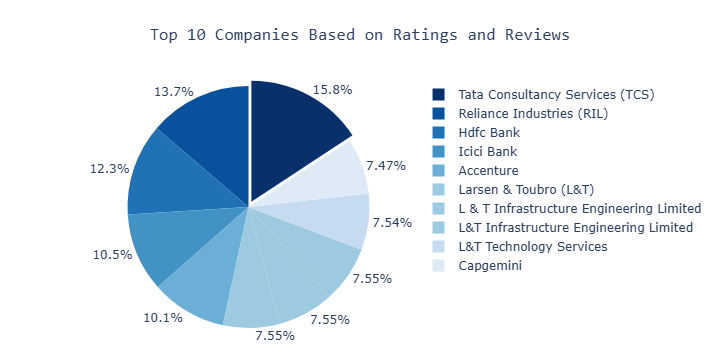

In [105]:
import plotly.express as px
import pandas as pd

# Assuming 'df' is your DataFrame and it has been defined earlier
filter = df.groupby(['company'])['rating_review_filter'].min().sort_values(ascending=False).head(10)
filter = filter.reset_index()
filter.columns = ['company', 'filter']

# Normalize the color values to range from 0 to 1
filter['color'] = (filter['filter'] - filter['filter'].min()) / (filter['filter'].max() - filter['filter'].min())

# Create an interactive pie chart with Plotly
fig = px.pie(
    filter,
    values='filter',
    names='company',
    title='Top 10 Companies Based on Ratings and Reviews',
    color='color',  # Use the normalized color for the pie slices
    color_discrete_sequence=px.colors.sequential.Blues_r,  # Using reversed blues color scheme
    hover_data=['filter']  # Show filter value on hover
)

# Update layout for better appearance
fig.update_layout(
    title_font_family="monospace",
    title_x=0.5,  # Center the title
    margin=dict(t=80, b=20, l=20, r=20)
)

# Make the chart interactive with labels outside and percentages inside
fig.update_traces(
    textposition='outside',  # Put labels outside
    textinfo='percent',      # Show only percentages inside
    hoverinfo='label+percent+value',
    pull=[0.05 if i == 0 else 0 for i in range(len(filter))]  # Pull out the first slice slightly
)

# Add the labels to the legend instead of on the pie
fig.update_layout(showlegend=True)

# Show the figure
fig.show()


### Companies hiring for data analyst


In [106]:
data_analyst_df = df[df['job_role'] == 'Data Analyst']
len(data_analyst_df)

59

In [107]:
data_analyst_df.groupby(['company'])['job_role'].size().reset_index().sort_values(by = 'job_role', ascending = False)[:10]

,company,job_role
24,NatWest Markets,2
5,CliqHR Recruitment Services,2
23,Megma Services,2
33,Quess It Staffing,2
44,Target,2
36,Radical Technologies,2
0,24dimensions,1
39,S&P Global Inc.,1
30,Prohub Technologies,1
31,PubMatic,1


In [103]:
df.groupby(['company'])['rating_review_filter'].min().reset_index().sort_values(by = 'rating_review_filter', ascending = False).head(10)

,company,rating_review_filter
13180,Tata Consultancy Services (TCS),0.001116
10826,Reliance Industries (RIL),0.001022
5595,Hdfc Bank,0.000893
6091,Icici Bank,0.000764
377,Accenture,0.000752
7416,L & T Infrastructure Engineering Limited,0.000562
7422,L&T Infrastructure Engineering Limited,0.000562
7511,Larsen & Toubro (L&T),0.000562
7423,L&T Technology Services,0.000562
2479,Capgemini,0.000529


### Skills needed for almost all the jobs

In [108]:
# we need to find which responsibility has the highest frequency

In [109]:
df.rename(columns = {'resposibilities': 'responsibilities'}, inplace = True)

according to the data most of the common skills needed for jobs on Naukri are shown below

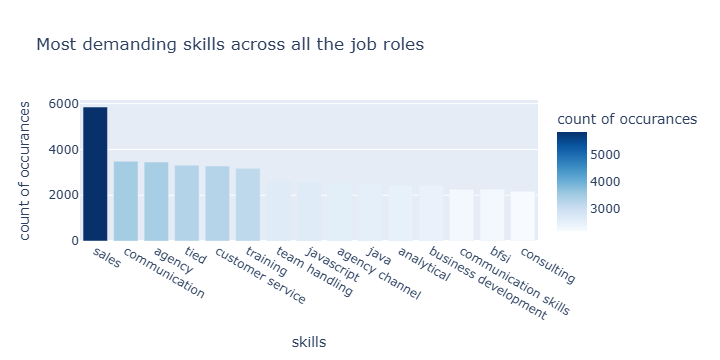

In [110]:
import plotly.express as px
skills_df_1 = df['responsibilities'].str.lower().str.split(',').explode().value_counts().head(15)
skills_df_1 = skills_df_1.reset_index()
skills_df_1.columns = ['skills', 'count']
fig = px.bar(skills_df_1 , x = 'skills', y = 'count', title = 'Most demanding skills across all the job roles' , color = 'count', labels = {'count': 'count of occurances'}, color_continuous_scale=px.colors.sequential.Blues)
fig.show()

### Skills needed to hired into hdfc bank

In [111]:
df_hdfc = df[df['company'] == 'Hdfc Bank']


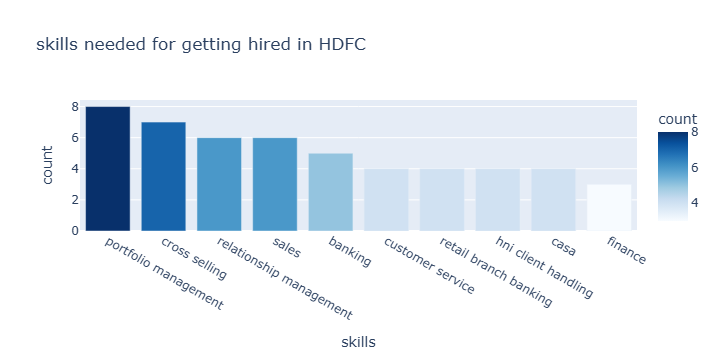

In [112]:
# df_hdfc['responsibilities'].str.lower().str.split(',').explode().value_counts().head(10).plot(kind = 'bar')
import pandas as pd
import plotly.express as px



# Process the data
responsibilities_counts = df_hdfc['responsibilities'].str.lower().str.split(',').explode().value_counts().head(10)
skills_df_2 = responsibilities_counts.reset_index()
skills_df_2.columns = ['skills', 'count']
fig = px.bar(skills_df_2,x = 'skills', y= 'count', title = 'skills needed for getting hired in HDFC', labels = {'Count': 'Count of occurences'}, color = 'count', color_continuous_scale = px.colors.sequential.Blues)
fig.show()


### Skills needed to hired as Data Analyst

In [113]:
df_data_analyst = df[df['job_role'] == 'Data Analyst']

In [114]:
data_analyst_skills = df_data_analyst['responsibilities'].str.lower().str.split(',').explode().value_counts()[:10]

In [115]:
values = data_analyst_skills.values

In [116]:
index = data_analyst_skills.index

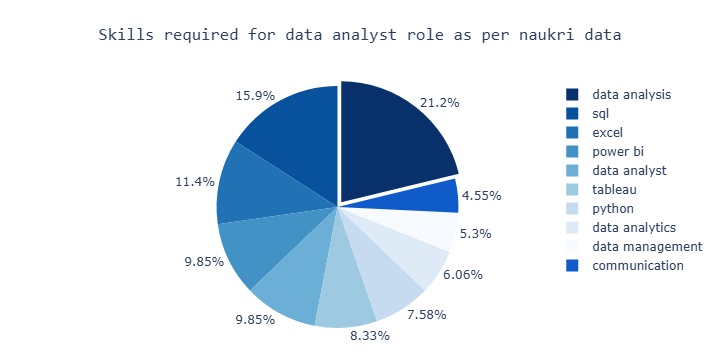

In [117]:
# import matplotlib.cm as cm
# plt.figure(figsize= (8,6))
# blues = plt.cm.Blues(np.linspace(0.4,0.8, len(index)))
# plt.pie(x = values, labels = index, autopct = "%1.1f%%", startangle = 160, colors = blues)

# plt.title('Skills required for data analyst role as per naukri data', fontname = 'monospace', pad = 30)
# plt.axis('equal')
# plt.tight_layout()
# plt.show()


import plotly.express as px
import pandas as pd

# Create a DataFrame from your data
skills_df = pd.DataFrame({
    'Skill': index,
    'Count': values
})

# Create an interactive pie chart with Plotly
fig = px.pie(
    skills_df, 
    values='Count', 
    names='Skill',
    title='Skills required for data analyst role as per naukri data',
    color_discrete_sequence=px.colors.sequential.Blues_r,  # Using blues color scheme
    hover_data=['Count']  # Show count on hover
)

# Update layout for better appearance
fig.update_layout(
    title_font_family="monospace",
    title_x=0.5,  # Center the title
    margin=dict(t=80, b=20, l=20, r=20)
)

# Make the chart interactive with labels outside and percentages inside
fig.update_traces(
    textposition='outside',  # Put labels outside
    textinfo='percent',      # Show only percentages inside
    hoverinfo='label+percent+value',
    pull=[0.05 if i == 0 else 0 for i in range(len(index))]  # Pull out the first slice slightly
)

# Add the labels to the legend instead of on the pie
fig.update_layout(showlegend=True)

fig.show()

Steps to data visualization:
- get the things done
- show the graph ||.plot
- finalize the visualization format
- select the appropriate colors , themes font , etc
- seaborn and plotly to finalize it

     1. Matplotlib
     2. seaborn
     3. plotly
     4. dash/dask

### Further Analysis

Text(0.5, 1.0, 'years of experience vs Number of jobs')

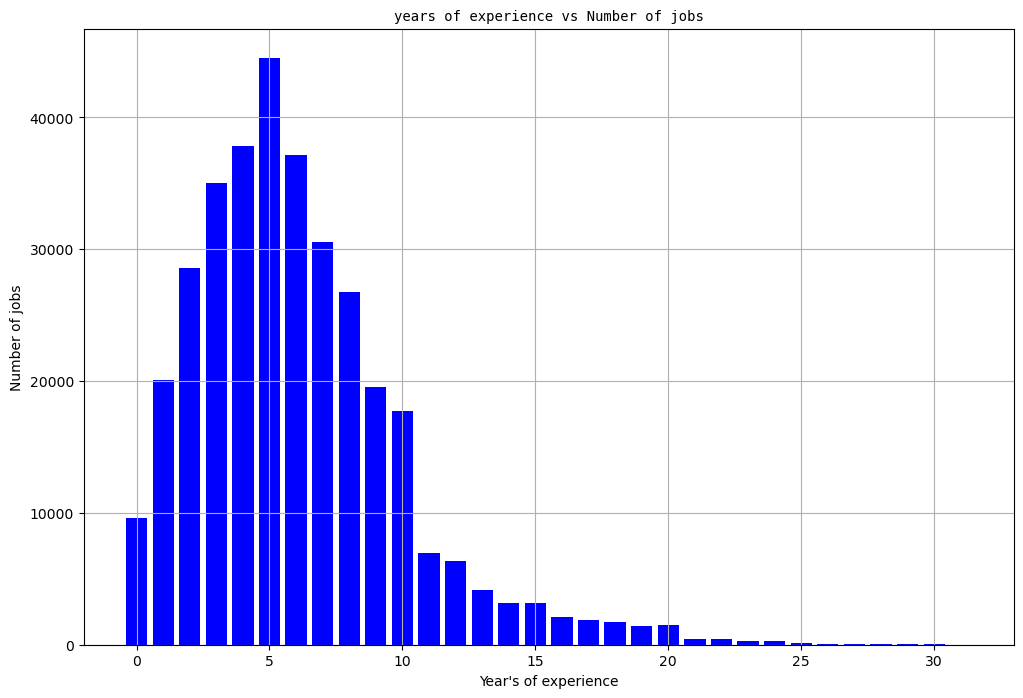

In [118]:
experience = []
job_counts = []
for exp in range(0,32):
    experience.append(exp)
    job_counts.append(len(df[(df['max_exp'] >= exp) & (df['min_exp'] <= exp)]))
plt.figure(figsize = (12,8))
plt.style.use('default')
plt.grid(True)
plt.bar(experience, job_counts, color = 'blue')
plt.xlabel("Year's of experience")
plt.ylabel("Number of jobs")
plt.title("years of experience vs Number of jobs", font = 'monospace')

### Year's of Experience vs. Number of Jobs
- The highest demand in the job market is for candidates with 4-6 years of experience, peaking at 5 years.
- 
Jobs requiring 0-3 years of experience also show strong demand, indicating good opportunities for early-career professional
-  After 6 years, the number of job opportunities gradually decreases, suggesting that mid-level positions dominate the market, while senior roles (10+ years) become progressively fewer.
-  Niche or leadership positions for candidates with 15+ years of experience exist but are significantly limited.mited.

## Conclusion:
 the job market is centered around **mid-level experience**, with **early-career roles** also in demand. Professinals should focus on skill development within 4-6 year window to leverage maximum job opportunities

### Average Salary of data analyst


In [119]:
df_data_analyst = df[df['job_role'] == 'Data Analyst']
df_data_analyst

,job_id,job_role,company,location,rating,reviews,responsibilities,min_exp,max_exp,min_salary,max_salary,clean_location,rating_review_filter
78,60123007052,Data Analyst,Publicis Groupe,"Pune, Ahmedabad, Gurgaon/Gurugram, Bangalore/B...",3.7,2060,"Big query,Data Mining,SQL,Statistical Modeling...",3,5,800000,1200000,"[Pune, Ahmedabad, Gurgaon, Gurugram, Bangalore...",1854.37
3299,50123007014,Data Analyst,Omniactive Health Technologies,Mumbai(Lower Parel),4.0,121,"excel,data analysis,power bi,market data,sales...",3,7,800000,1300000,"[Mumbai(Lower, Parel)]",109.30
5648,200722010262,Data Analyst,Quickxpert Infotech,"Kolkata, Indore, Hyderabad/Secunderabad, Pune,...",3.6,28,"SQL,python,C++,C,it,trainee,data analyst,bcom",0,5,Not disclosed,Not disclosed,"[Kolkata, Indore, Hyderabad, Secunderabad, Pun...",25.56
7804,291222005437,Data Analyst,GlobalLogic,Hyderabad/Secunderabad,4.0,14,"2D,Lidar,labelling,Annotation,verbal communica...",1,3,250000,275000,"[Hyderabad, Secunderabad]",13.00
13106,70123500597,Data Analyst,Target,Bangalore/Bengaluru,4.4,391,"Product management,Change management,Database ...",2,4,Not disclosed,Not disclosed,"[Bangalore, Bengaluru]",352.34
13483,60123501581,Data Analyst,Hackerearth,Bangalore/Bengaluru,4.0,23,"Data analysis,Data validation,GIT,Web analytic...",2,5,Not disclosed,Not disclosed,"[Bangalore, Bengaluru]",21.10
17019,71122001529,Data Analyst,Cointab Software,"Mumbai Suburban, Mumbai (All Areas)",2.3,2,"data analysis,Python,Financial Reporting,Finan...",0,2,Not disclosed,Not disclosed,"[Mumbai, Suburban, Mumbai]",2.03
17062,70123500879,Data Analyst,Control Risks India Pvt Ltd.,Mumbai,4.2,5,"Career development,Automation,Excel,Coding,Pro...",1,3,Not disclosed,Not disclosed,[Mumbai],4.92
17224,60123501955,Data Analyst,Axis My India Ltd.,Mumbai,4.4,174,"Data analysis,Automation,Data collection,Marke...",1,4,Not disclosed,Not disclosed,[Mumbai],157.04
17439,60123005145,Data Analyst,Instinox Llp,Mumbai,0.0,0,"python,data analysis,google data studio,power ...",1,3,Not disclosed,Not disclosed,[Mumbai],0.00


In [120]:
filtered_df = df_data_analyst[(df_data_analyst['min_salary'] != 'Not disclosed') & (df_data_analyst['max_salary'] != 'Not disclosed')]
midpoint_salaries = (filtered_df['min_salary'].astype('int') + filtered_df['max_salary'].astype('int')) / 2
avg_salary = midpoint_salaries.mean()
avg_salary

606250.0

## Average Salary by every company


In [121]:
df['min_salary'] = df['min_salary'].replace('MBA/PGDM', 'Not disclosed')

In [122]:
new_df = df[(df['min_salary'] != 'Not disclosed') & (['max_salary'] != 'Not disclosed')]

C:\Users\moham\AppData\Local\Temp\ipykernel_24220\4198627637.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



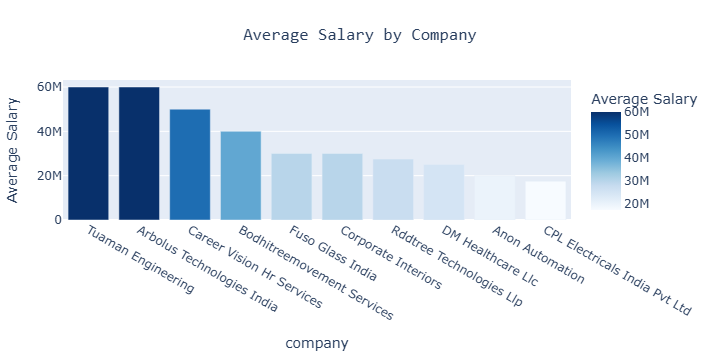

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

# Assuming new_df is already defined and contains the relevant data
# Convert 'min_salary' to integer
new_df['min_salary'] = new_df['min_salary'].astype(int)

# Calculate the average minimum salary by company
top_companies = new_df.groupby('company')['min_salary'].mean().sort_values(ascending=False).reset_index().head(10)
top_companies.columns = ['company', 'salary']

# Plotting the results
fig = px.bar(top_companies, 
             x='company', 
             y='salary', 
             title='Average Salary by Company', 
             labels={'salary': 'Average Salary'}, 
             color='salary', 
             color_continuous_scale=px.colors.sequential.Blues)  # Use continuous color scale

# Update layout for better appearance
fig.update_layout(
    title_font_family="monospace",
    title_x=0.5,  # Center the title
    margin=dict(t=80, b=20, l=20, r=20)
)

fig.show()


In [124]:
df

,job_id,job_role,company,location,rating,reviews,responsibilities,min_exp,max_exp,min_salary,max_salary,clean_location,rating_review_filter
0,70123006070,Branch Banking - Calling For Women Candidates,Hdfc Bank,"Kolkata, Hyderabad/Secunderabad, Pune, Ahmedab...",4.0,39110,"Customer Service,Sales,Relationship Management",1,6,Not disclosed,Not disclosed,"[Kolkata, Hyderabad, Secunderabad, Pune, Ahmed...",35199.40
1,60123905908,Product Owner Senior Manager,Accenture,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",4.1,32129,"Product management,Market analysis,Change mana...",11,15,Not disclosed,Not disclosed,"[Kolkata, Mumbai, Hyderabad, Secunderabad, Pun...",28916.51
2,60123905898,Employee Relations and Policies Associate Manager,Accenture,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",4.1,32129,"Business process,Change management,Team manage...",3,7,Not disclosed,Not disclosed,"[Kolkata, Mumbai, Hyderabad, Secunderabad, Pun...",28916.51
3,60123905897,Employee Relations and Policies Specialist,Accenture,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",4.1,32129,"Business process,Change management,Team manage...",3,7,Not disclosed,Not disclosed,"[Kolkata, Mumbai, Hyderabad, Secunderabad, Pun...",28916.51
4,60123008332,SAP BO Consultant,Mindtree,"Hybrid - Kolkata, Hyderabad/Secunderabad, Pune...",4.1,3759,"SAP BO,PL / SQL,Oracle SQL,SAP Business Object...",5,7,Not disclosed,Not disclosed,"[Hybrid, -, Kolkata, Hyderabad, Secunderabad, ...",3383.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...
73762,20123002989,Partner Success Executive/Edtech/Punjab,Parth Associates,"Jalandhar, Chandigarh, Amritsar",0.0,0,"CRM,Communication Skills,Presentation Skills,C...",1,5,700000,850000,"[Jalandhar, Chandigarh, Amritsar]",0.00
73763,20123002957,Partner Success Associate/Edtech/Punjab,Parth Associates,"Ludhiana, Patiala, Moga",0.0,0,"CRM,Communication Skills,Presentation Skills,C...",1,5,700000,850000,"[Ludhiana, Patiala, Moga]",0.00
73764,231222003986,Hiring For International Voice Process | Gurga...,First Step Solutions,"New Delhi, Gurgaon/Gurugram",0.0,0,"Customer Service,US Process,Hospitality,Custom...",1,4,300000,450000,"[New, Delhi, Gurgaon, Gurugram]",0.00
73765,171220001449,Fresher Engineer,Sofcon,"Kota, Udaipur, Banswara, Bhiwadi, Jaipur, Alwa...",2.8,3,"ENGINEERING,B Tech Fresher,AutoCAD,Degree,PLC,...",0,2,Not disclosed,Not disclosed,"[Kota, Udaipur, Banswara, Bhiwadi, Jaipur, Alw...",2.98


In [125]:
# Assuming 'df' is your DataFrame and 'clean_location' is a column in it
locations = df['clean_location'].explode().value_counts().head(20).reset_index()
locations.columns = ['location', 'count']

# Process each location
for i in locations.index:
    location = locations.at[i, 'location']
    
    # Convert to lowercase
    location = location.lower()
    
    # Replace specific values
    location = location.replace('bengaluru', 'bangalore')  # Replace 'bengaluru' with 'bangalore'
    location = location.replace('-', ' ')  # Replace hyphens with a space (or remove them)
    
    # Update the DataFrame with the modified location
    locations.at[i, 'location'] = location.strip()  # Strip any leading/trailing whitespace

# Remove rows with blank locations
locations = locations[locations['location'] != '']
locations = locations.groupby('location', as_index=False).sum()
locations = locations.reset_index(drop = True)

# Print the updated locations
print(locations)


        location  count
0      ahmedabad   2438
1      bangalore  35485
2        chennai   6814
3          delhi   6536
4        gurgaon   5356
5       gurugram   5135
6         hybrid   3532
7      hyderabad   8207
8        kolkata   2307
9         mumbai   9734
10           ncr   4207
11           new   2515
12         noida   4120
13     permanent   1622
14          pune   7067
15        remote   1625
16  secunderabad   7612


In [126]:
locations = locations.reset_index(drop = True)
locations = locations.sort_values(by = 'count', ascending = False)

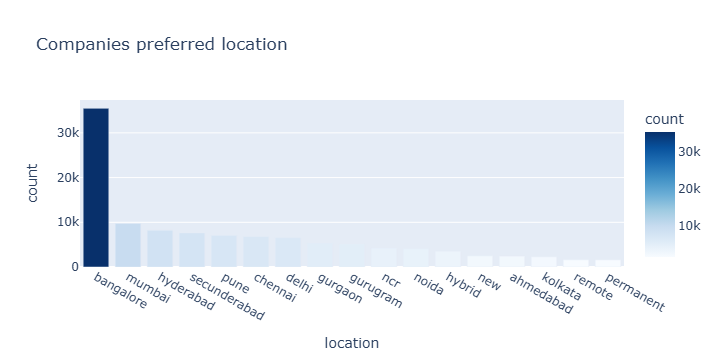

In [127]:
fig = px.bar(locations , x = 'location' , y = 'count' ,labels = {'count': 'count'}, title = 'Companies preferred location', color = 'count',color_continuous_scale = px.colors.sequential.Blues)
fig.show()